# Imports and loading data

In [1]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
data = pd.read_csv(r"C:\Users\brian\Downloads\train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
#getting columns with missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Cleaning

In [5]:
#Dropping unwanted columns
data_ = data.drop(columns=['PassengerId','Ticket','Name', 'Cabin'],axis=1)

In [6]:

data_.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [7]:
#imputing missing values
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
data_['Age']=imp.fit_transform(data_[['Age']])

In [8]:
data_.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [9]:
data_.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
#mapping categorical features
data_.Sex = data_.Sex.map({'female':1, 'male':0})
data_.Embarked = data_.Embarked.map({'C':0,'S':1,'Q':2,'nan':3})
data_.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,1.0
3,1,1,1,35.0,1,0,53.1000,1.0
4,0,3,0,35.0,0,0,8.0500,1.0


In [11]:
data_.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [12]:
#Deleting rows with no values
data_c=data_.dropna(axis=0)

In [13]:
data_c.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
#Selecting features
x=data_c.loc[:, data_c.columns!='Survived']

In [15]:
#Selecting target
y=data_c[['Survived']]

# Training and fitting

In [16]:
#Splitting training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [17]:
#importing Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
#getting accuracy score of prediction
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7940074906367042

In [20]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
c_matrix=confusion_matrix(y_test, y_pred)
c_matrix

array([[147,  20],
       [ 35,  65]], dtype=int64)

<AxesSubplot:>

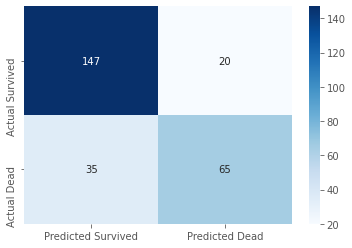

In [21]:
#Visualizing confusion matrix
import seaborn as sns
xlabels=['Predicted Survived', 'Predicted Dead']
ylabels=['Actual Survived', 'Actual Dead']
sns.heatmap(c_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=xlabels, yticklabels=ylabels)

In [22]:
#from the confusion matrix above, 147 people were classified survived correctly as well as 65 people were classified as dead correctly
#35 people were classified as survived incorrectly whereas 20 people were classified as dead incorrectly

# Prediction

In [23]:
#prediction on unseen data
test=pd.read_csv(r"C:\Users\brian\Downloads\test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [25]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
test_ = test.drop(columns=['PassengerId','Ticket','Name', 'Cabin'],axis=1)

In [27]:
dimp = SimpleImputer(missing_values=np.nan, strategy = 'mean')
test_['Age']=dimp.fit_transform(test_[['Age']])

In [28]:
test_.Sex = test_.Sex.map({'female':1, 'male':0})
test_.Embarked = test_.Embarked.map({'C':0,'S':1,'Q':2,'nan':3})
test_.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,1
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,1
4,3,1,22.0,1,1,12.2875,1


In [29]:
test_.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [30]:
imp = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
test_['Fare']=imp.fit_transform(test_[['Fare']])

In [31]:
test_.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
prediction=lr.predict(test_)

In [33]:
my_prediction=pd.DataFrame({'PassengerId':test['PassengerId'], 'Name':test['Name'],'Sex':test['Sex'],'Age':test['Age'] ,'Survived':prediction})
my_prediction.to_csv('prediction.csv', index=False)

In [34]:
pred_data=pd.read_csv('prediction.csv')
pred_data.head()

,PassengerId,Name,Sex,Age,Survived
0,892,"Kelly, Mr. James",male,34.5,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,0
2,894,"Myles, Mr. Thomas Francis",male,62.0,0
3,895,"Wirz, Mr. Albert",male,27.0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1


<AxesSubplot:xlabel='Survived', ylabel='count'>

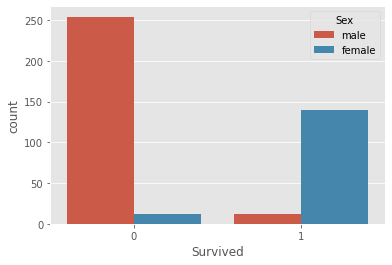

In [35]:
sns.countplot(x='Survived',hue='Sex',data=pred_data)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

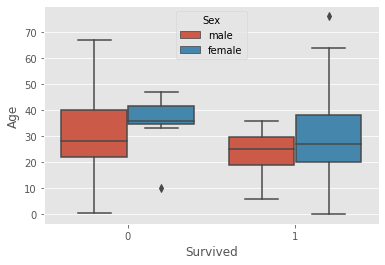

In [36]:
sns.boxplot(x='Survived',y='Age',hue='Sex', data=pred_data)